<a href="https://colab.research.google.com/github/shrashti-19/Waste-Collection-Management/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim:
To design and implement a Convolutional Neural Network (CNN) model that classifies waste images into categories such as plastic, glass, metal, and paper to promote efficient recycling.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
!pip install kaggle


In [13]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shrashtidwivedi","key":"7793578b6420929c3fae2a3d1ea948c5"}'}

In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"


In [15]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [17]:
!kaggle datasets download -d mostafaabla/garbage-classification


Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0


In [18]:
!unzip garbage-classification.zip


Streaming output truncated to the last 5000 lines.
  inflating: garbage_classification/paper/paper381.jpg  
  inflating: garbage_classification/paper/paper382.jpg  
  inflating: garbage_classification/paper/paper383.jpg  
  inflating: garbage_classification/paper/paper384.jpg  
  inflating: garbage_classification/paper/paper385.jpg  
  inflating: garbage_classification/paper/paper386.jpg  
  inflating: garbage_classification/paper/paper387.jpg  
  inflating: garbage_classification/paper/paper388.jpg  
  inflating: garbage_classification/paper/paper389.jpg  
  inflating: garbage_classification/paper/paper39.jpg  
  inflating: garbage_classification/paper/paper390.jpg  
  inflating: garbage_classification/paper/paper391.jpg  
  inflating: garbage_classification/paper/paper392.jpg  
  inflating: garbage_classification/paper/paper393.jpg  
  inflating: garbage_classification/paper/paper394.jpg  
  inflating: garbage_classification/paper/paper395.jpg  
  inflating: garbage_classification/pa

In [19]:
import os
os.listdir()  # List files in the current directory


['.config',
 'garbage_classification',
 'garbage-classification.zip',
 'sample_data']

In [22]:
# Check the contents of the 'garbage_classification' directory
!ls /content/garbage_classification


battery     brown-glass  clothes      metal  plastic  trash
biological  cardboard	 green-glass  paper  shoes    white-glass


In [23]:
!mkdir -p /content/garbage_classification/train
!mkdir -p /content/garbage_classification/test


In [24]:
!mkdir -p /content/garbage_classification/train/{battery,brown-glass,clothes,metal,plastic,trash,biological,cardboard,green-glass,paper,shoes,white-glass}
!mkdir -p /content/garbage_classification/test/{battery,brown-glass,clothes,metal,plastic,trash,biological,cardboard,green-glass,paper,shoes,white-glass}


In [25]:
!pip install split-folders
import splitfolders

# Split the data into 80% train, 20% test
splitfolders.ratio('/content/garbage_classification', output='/content/garbage_classification_split', seed=1337, ratio=(.8, .2))


Copying files: 15515 files [00:03, 5109.25 files/s]


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/garbage_classification_split/train'
test_dir = '/content/garbage_classification_split/val'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 12409 images belonging to 14 classes.
Found 3106 images belonging to 14 classes.


In [35]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')  # 14 classes, softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 113s 287ms/step - accuracy: 0.4774 - loss: 1.6358 - val_accuracy: 0.6478 - val_loss: 1.0136
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 113s 291ms/step - accuracy: 0.6743 - loss: 0.9587 - val_accuracy: 0.7077 - val_loss: 0.8760
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - accuracy: 0.7559 - loss: 0.7333 - val_accuracy: 0.7489 - val_loss: 0.7816
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 111s 287ms/step - accuracy: 0.8037 - loss: 0.6044 - val_accuracy: 0.7746 - val_loss: 0.7084
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 108s 280ms/step - accuracy: 0.8543 - loss: 0.4384 - val_accuracy: 0.7746 - val_loss: 0.7337
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 109s 280ms/step - accuracy: 0.8898 - loss: 0.3230 - val_accuracy: 0.7486 - val_loss: 0.8374
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 109s 280ms/step - accuracy: 0.9220 - loss: 0.2374 - val_accuracy: 0.7772 - val_loss: 0.8749
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 144s 285ms/step - accuracy: 0.9408 -

In [36]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7782 - loss: 0.9991
Test Accuracy: 77.11%


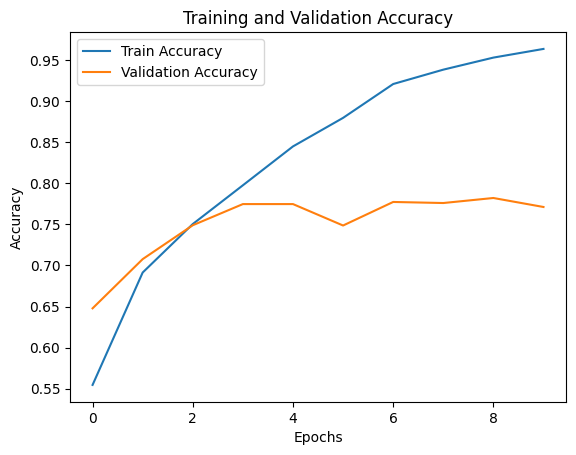

In [37]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


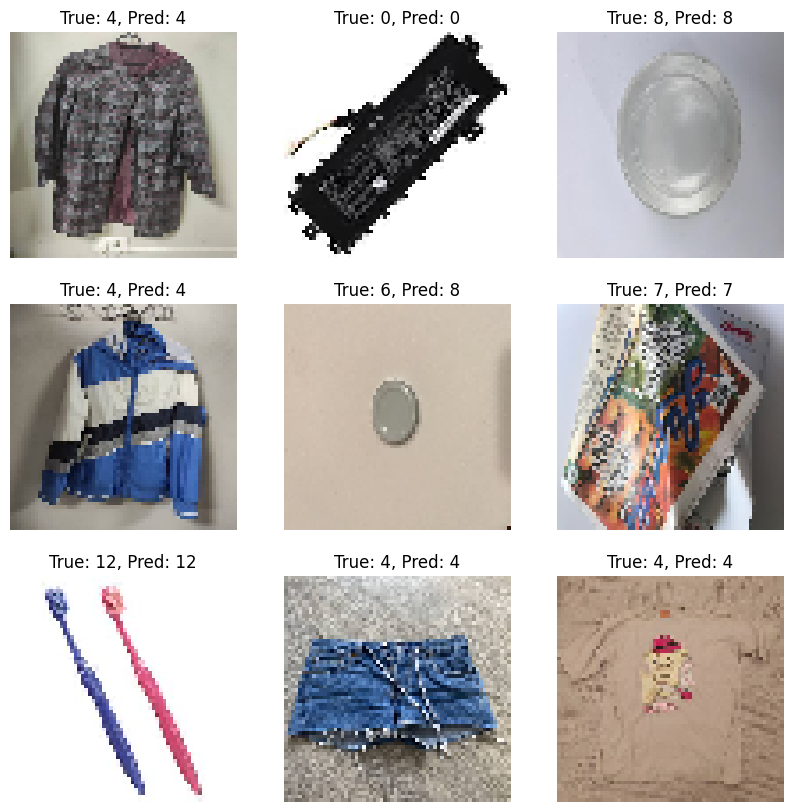

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Get some test images
test_images, test_labels = next(test_generator)

# Make predictions
predictions = model.predict(test_images)

# Plot a few test images with their predicted class
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = test_images[i]
    plt.imshow(img)
    true_label = np.argmax(test_labels[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f'True: {true_label}, Pred: {predicted_label}')
    plt.axis('off')
plt.show()
